# Derivas de concepto en la cadena de bloques. Método DummyDriftDetector

Detección de derivas de concepto en el número de transacciones de la cadena de bloques, a partir del método DummyDriftDetector, con salida gráfica.

In [1]:
!pip install river

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from btc_connect import btc_connect
from river import drift
import datetime, matplotlib.pyplot as plt

In [3]:
# Conección al nodo local
rpc_connection = btc_connect()

In [4]:
# Intervalo de bloques
start = 800000 # Inicio: 0 
end = 852999 # Para último bloque de la cadena: rpc_connection.getblockcount() 

In [5]:
# Adaptación de función para graficar el total de transacciones por bloque y las derivas de concepto detectadas
# https://riverml.xyz/latest/introduction/getting-started/concept-drift-detection/
def plot_transaction(x, y, xlabel, drift=None):
    fig, ax = plt.subplots(figsize=(8,4))
    ax.plot(x, y, color="greenyellow", label="transacciones")
    ax.set_ylim(bottom=0)
    ax.set_title("Número de transacciones por bloque")
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Transacciones")
    if drift is not None:
        legend=0
        for drift_detected in drift:
            if legend==0:
                ax.axvline(drift_detected, color="red", linestyle=":", label="derivas de concepto")
                legend=1
            else:
                ax.axvline(drift_detected, color="red", linestyle=":")
    fig.legend(loc="outside upper left")
    plt.show()

In [6]:
block_number = []
transactions = []

# DummyDriftDetector Valores por defecto:
# https://riverml.xyz/dev/api/drift/DummyDriftDetector/
# trigger_method=fixed  -> Método de activación (fijo o aleatorio)
# t_0=300               -> Punto de referencia para definir disparadores
# w=0                   -> Parámetro auxiliar: Si la activación es fija, las señales de deriva sólo comenzarán después de un período aleatorio definido
#                          entre [0,w]. Si la activación es aleatoria (random), w define los límites de probabilidad de desencadenar una deriva
# dynamic_cloning=False -> Determina si deben cambiarse los valores de w y seed cada vez que se clone el disparador
# seed=None             -> Semilla aleatoria (una misma semilla genera los mismos valores aleatorios, con el fin de conseguir reproducibilidad)

# The 'w' value must be greater than zero when 'trigger_method' is 'random'
drift_detector = drift.DummyDriftDetector()

block_drift = []  # Bloques en los que se detecta una deriva de concepto
block_transactions_drift = []  # Total de transacciones de dichos bloques
block_datetime_drift = []  # Marca temporal de los bloques

for i in range (start, end + 1):
    blockhash = rpc_connection.getblockhash(i)  # Obtiene el hash del bloque
    block = rpc_connection.getblock(blockhash)  # Obtiene el bloque
    block_number.append(i)
    transactions.append(block["nTx"])  # Número de transacciones del bloque

    drift_detector.update(block["nTx"])
    if drift_detector.drift_detected:  # Deriva de concepto detectada
        block_drift.append(i)
        block_transactions_drift.append(block["nTx"])
        block_datetime_drift.append(datetime.datetime.fromtimestamp(block["time"]))

xlabel = f"Bloques: {start} a {end}"

### Derivas de concepto detectadas

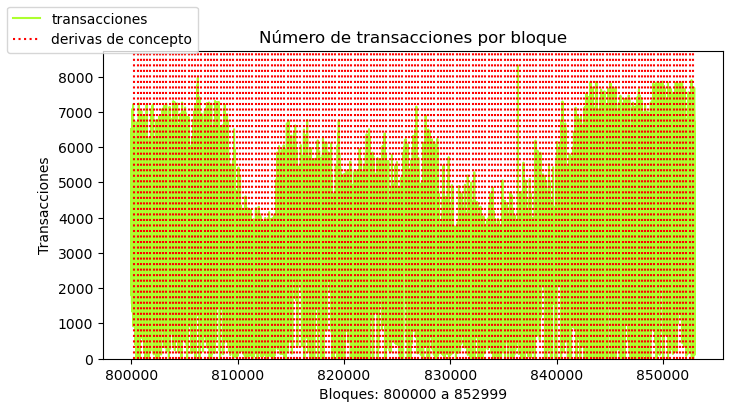

In [7]:
plot_transaction(block_number, transactions, xlabel, block_drift)

### Bloque de comienzo, número de transacciones y marca temporal de minado

In [8]:
for x, y, z in (zip(block_drift, block_transactions_drift, block_datetime_drift)):
    print(f"Bloque {x}: {y} transacciones - {z.strftime('%d/%m/%Y %H:%M:%S')}")

Bloque 800299: 3973 transacciones - 26/07/2023 06:31:43
Bloque 800599: 3531 transacciones - 28/07/2023 10:44:08
Bloque 800899: 6175 transacciones - 30/07/2023 14:42:20
Bloque 801199: 3099 transacciones - 01/08/2023 14:21:03
Bloque 801499: 3254 transacciones - 03/08/2023 13:20:09
Bloque 801799: 3630 transacciones - 05/08/2023 16:52:57
Bloque 802099: 2177 transacciones - 07/08/2023 15:29:13
Bloque 802399: 1853 transacciones - 09/08/2023 18:09:47
Bloque 802699: 2169 transacciones - 11/08/2023 20:15:11
Bloque 802999: 4890 transacciones - 13/08/2023 21:21:05
Bloque 803299: 3401 transacciones - 15/08/2023 15:04:26
Bloque 803599: 2659 transacciones - 17/08/2023 12:42:53
Bloque 803899: 2991 transacciones - 19/08/2023 16:32:53
Bloque 804199: 5312 transacciones - 21/08/2023 11:00:14
Bloque 804499: 2966 transacciones - 23/08/2023 11:55:13
Bloque 804799: 3320 transacciones - 25/08/2023 15:35:14
Bloque 805099: 4443 transacciones - 28/08/2023 00:36:03
Bloque 805399: 4766 transacciones - 30/08/2023 0